In [1]:
import six
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from stompy.model.fish_ptm import ptm_config, ptm_tools
six.moves.reload_module(ptm_config)
%matplotlib notebook

In [5]:
cfg=ptm_config.PtmConfig.load('/opt2/sfb_ocean/ptm/all_source_020/20170715/w0.0')

In [6]:
recs=[]

for bf in cfg.bin_files():
    ptmbin=ptm_tools.PtmBin(bf)
    tn=ptmbin.count_timesteps()
    timestamp,data=ptmbin.read_timestep(tn-1)
    recs.append(dict(filename=os.path.basename(bf),
                     nsteps=tn,
                     nparticles=len(data)))   

df=pd.DataFrame(recs)
df

,filename,nparticles,nsteps
0,Alameda_Creek_none_bin.out,3600,1441
1,Arroyo_Corte__none_bin.out,2668,1441
2,Arroyo_del_Ha_none_bin.out,3254,1441
3,Black_Point_none_bin.out,2030,1441
4,Castro_Creek_none_bin.out,2895,1441
5,Cerrito_Creek_none_bin.out,3267,1441
6,Colma_Creek_none_bin.out,3481,1441
7,Corte_Madera__none_bin.out,3600,1441
8,Coyote_Creek__1ser_none_bin.out,2375,1441
9,Coyote_Creek__none_bin.out,3600,1441


In [7]:
df.nparticles.sum()

273853

In [8]:
ptmbin=ptm_tools.PtmBin(cfg.bin_files()[0])

In [19]:
cfg.bin_files()[0]

'/opt2/sfb_ocean/ptm/all_source_020/20170715/w0.0/Alameda_Creek_none_bin.out'

In [9]:
ptmbin.count_timesteps()

1441

In [10]:
timestamp,data=ptmbin.read_timestep(339)

(562063.2071792344, 583831.2974271997, 4146982.4755172483, 4164760.699483908)

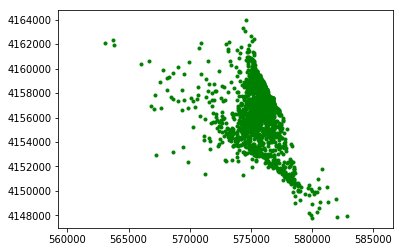

In [12]:
plt.figure()
plt.plot(data['x'][:,0],
         data['x'][:,1],'g.')
plt.axis('equal')

In [13]:
# how many particles get stuck for more than a day?
stepA=1000
stepB=stepA+24

timeA,dataA=ptmbin.read_timestep(stepA)
timeB,dataB=ptmbin.read_timestep(stepB)


In [14]:
timeA,timeB # yep, 24 hours apart.

(datetime.datetime(2017, 8, 25, 16, 0), datetime.datetime(2017, 8, 26, 16, 0))

In [15]:
len(dataA),len(dataB)

(3600, 3600)

In [17]:
np.all( dataA['id']==dataB['id'] ) # good.

True

In [18]:
np.sum( np.all( dataA['x']==dataB['x'],axis=1)) # just 3 particles.

3

In [25]:
bin_files=['/opt2/sfb_ocean/ptm/all_source_020/20170715/w0.0/Alameda_Creek_none_bin.out',
           '/opt2/sfb_ocean/ptm/all_source_020/20170715/w0.05/Alameda_Creek_up50000_bin.out',
           '/opt2/sfb_ocean/ptm/all_source_020/20170715/w-0.05/Alameda_Creek_down50000_bin.out']

# how many particles get stuck for more than a day?
stepA=1000
stepB=stepA+24

for bf in bin_files:
    pbf=ptm_tools.PtmBin(bf)
 
    timeA,dataA=pbf.read_timestep(stepA)
    timeB,dataB=pbf.read_timestep(stepB)
    assert np.all( dataA['id']==dataB['id'] )
    nstuck=np.sum( np.all( dataA['x']==dataB['x'],axis=1)) # just 3 particles. 
    print(f"{os.path.basename(bf):32}: {nstuck}/{len(dataA)} {100.*nstuck/len(dataA):.1f}% stuck particles over 24 hour")

Alameda_Creek_none_bin.out      : 3/3600 0.1% stuck particles over 24 hour
Alameda_Creek_up50000_bin.out   : 0/3600 0.0% stuck particles over 24 hour
Alameda_Creek_down50000_bin.out : 109/3600 3.0% stuck particles over 24 hour
